<a href="https://colab.research.google.com/github/venkatesh-r96/Customer-conversion-prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER CONVERSION PREDICTION

Importing Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Customer conversion prediction/Customer_Conversion_Prediction_train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


**Data Cleaning**

In [ ]:
df.shape

(45211, 11)

In [ ]:
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
duplicates = df.duplicated().sum()
duplicates

6

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df.loc[df['job'] == 'unknown', 'job'] = df['job'].mode()[0]

In [ ]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df.loc[df['education_qual'] == 'unknown', 'education_qual'] = df['education_qual'].mode()[0]

In [ ]:
df['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.shape

(45205, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [ ]:
IQR = df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
UL = df.dur.quantile(0.75)+ (1.5*IQR)
LL = df.dur.quantile(0.25)- (1.5*IQR)
UL,LL

(643.0, -221.0)

In [ ]:
df.loc[:, 'dur'] = df['dur'].clip(LL, UL)

In [ ]:
IQR = df['num_calls'].quantile(0.75)-df['num_calls'].quantile(0.25)
UL = df.num_calls.quantile(0.75)+ (1.5*IQR)
LL = df.num_calls.quantile(0.25)- (1.5*IQR)
UL,LL

(6.0, -2.0)

In [ ]:
df.loc[:, 'num_calls'] = df['num_calls'].clip(LL, UL)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df['target'] = df['y'].map({'yes':1 , "no": 0})

In [ ]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

# Exploratory Data Analysis

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

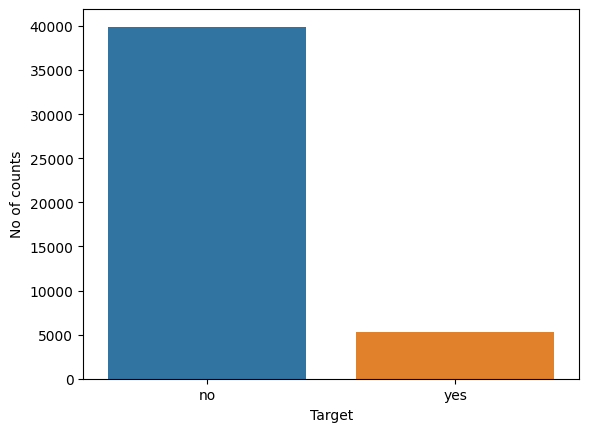

In [ ]:
sns.countplot(x='y',data = df)
plt.xlabel("Target")
plt.ylabel("No of counts")
plt.plot

**The plot is showing this is a imbalanced data**

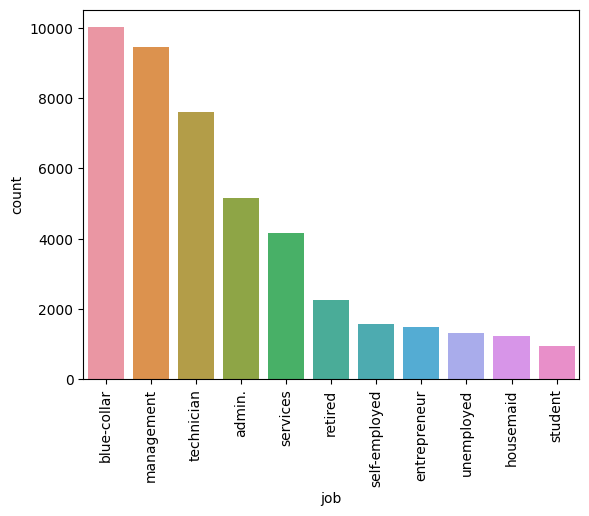

In [ ]:
df_i=pd.DataFrame(df.job.value_counts()).sort_values("job", ascending = False).reset_index()
df_i.rename(columns = {'index':"job",'job':'count'}, inplace  = True)
bar = sns.barplot(x = df_i['job'], y= df_i['count'], data = df_i)
bar.tick_params(axis = 'x', rotation = 90)

<Axes: ylabel='job'>

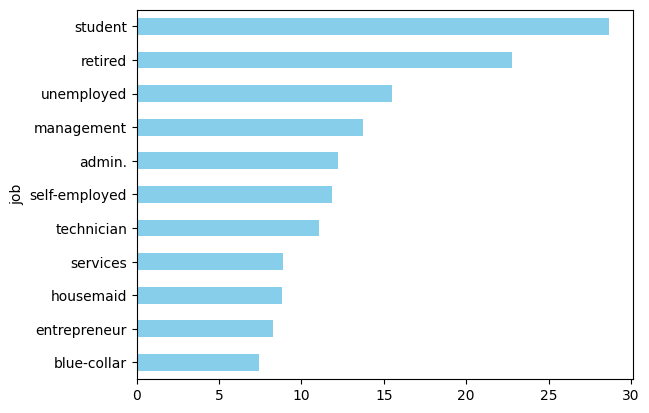

In [ ]:
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind = 'barh',color = 'skyblue')


There is ordinal replationship between job and target. so for label encoding we can give vales like 0 for blue-collar, 10 for students.

<Axes: ylabel='marital'>

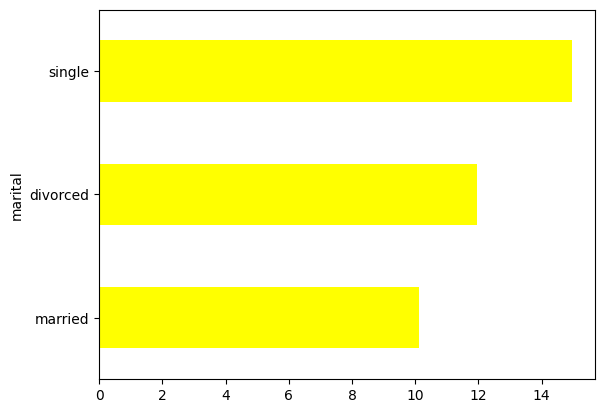

In [ ]:
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind = 'barh',color = 'yellow')

label encoding = 0-married , 1- divorced, 2-single

<Axes: ylabel='education_qual'>

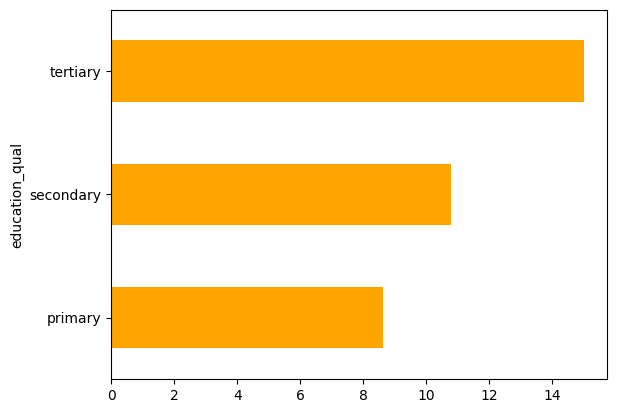

In [ ]:
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind = 'barh',color = 'orange')


label encoding = 0-primary , 1-secondary, 2-unknown

<Axes: ylabel='call_type'>

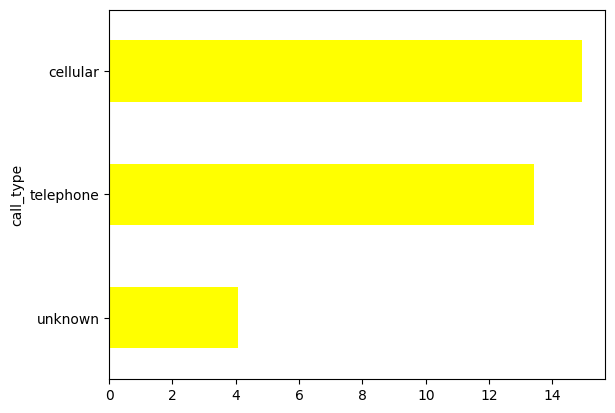

In [ ]:
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind = 'barh',color = 'yellow')

label encoding = 0-unknown , 1-telephone, 2-cellular

<Axes: ylabel='mon'>

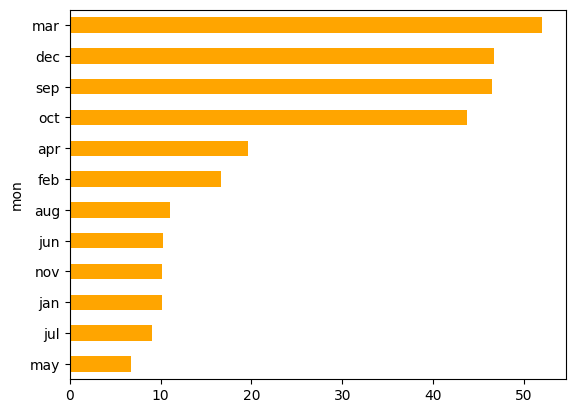

In [ ]:
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind = 'barh',color = 'orange')

<Axes: ylabel='prev_outcome'>

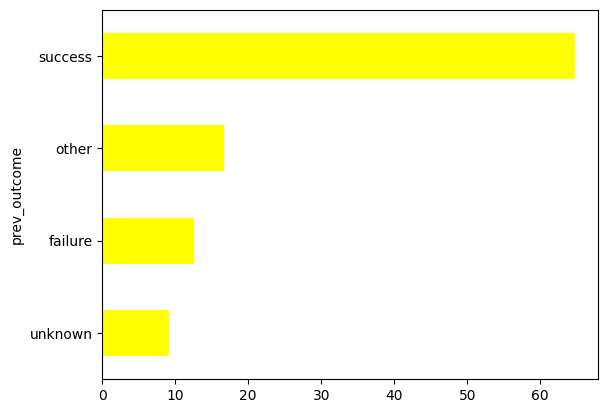

In [ ]:
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind = 'barh',color = 'yellow')

In [ ]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

**If it a success there is a 64.5 % chace is there for insurance takeup**

<Axes: xlabel='y', ylabel='age'>

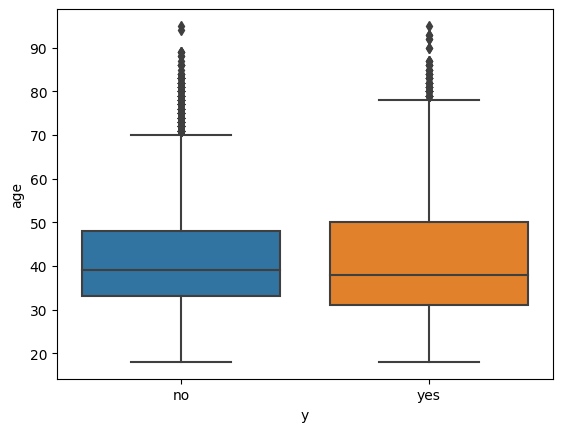

In [ ]:
sns.boxplot(df,x= 'y',y = 'age')

# Data Encoding

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,643,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


**Visualize the correlation between the Different elements**

In [ ]:
#Copying df data to df1
df1 = df.copy()

In [ ]:
df1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,643,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [ ]:
df1.isnull().sum()


age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [ ]:

df1["job"] = df1["job"].map({"blue-collar" : 0, "entrepreneur" : 1 , "housemaid" : 2, "services" : 3, "technician" : 4, "self-employed": 5, "admin.": 6, "management" : 7, "unemployed": 8, "retired": 9, "student" : 10})
df1["marital"] = df1["marital"].map({"married" : 0, "divorced" : 1 , "single" : 2})
df1["education_qual"] = df1["education_qual"].map({"primary": 0, "secondary": 1 , "tertiary": 2})
df1["call_type"] = df1["call_type"].map({"unknown": 0,"cellular": 2 , "telephone" : 1})
df1["mon"] = df1["mon"].map({"may": 0, "jul": 1, "jan": 2,"nov": 3, "jun": 4, "aug": 5, "feb": 6, "apr": 7,"oct" : 8,"sep": 9,"dec": 10,"mar":11})
df1["prev_outcome"] = df1["prev_outcome"].map({"unknown":0, "failure":1 , "other": 2, "success": 3})


This is imbalance data set so first will build model with actual dataset. then we will convert dataset with Random undersampling and Random oversamplig methods to balance the dataset.

**Splitting the Dataset**

In [ ]:
x = df1[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon','dur', 'num_calls', 'prev_outcome']]
y = df1['target']

In [ ]:
# Splitting the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 7)

# MODEL CREATION

**Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logreg = LogisticRegression()

In [ ]:
# Train the model on the training data
logreg.fit(x_train, y_train)

# Make predictions on the test datai
y_pred = logreg.predict(x_test)

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [ ]:
# Display confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7755  255]
 [ 733  298]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8010
           1       0.54      0.29      0.38      1031

    accuracy                           0.89      9041
   macro avg       0.73      0.63      0.66      9041
weighted avg       0.87      0.89      0.88      9041



**Resampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler() #Intialise the model
x_rus, y_rus = rus.fit_resample(x, y) #resampling the data

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model
x_ros, y_ros = ros.fit_resample(x, y) #Fit the model

In [ ]:
y_ros.sum(), y.sum(), y_rus.sum()

(39916, 5289, 5289)

# Under-sampling: Cluster Centroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 20})
x_cc, y_cc = cc.fit_resample(x, y)


In [ ]:
y_cc.sum()/y_cc.shape[0]

0.9962328122056885

**Over-sampling: SMOTE**

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

**Over-sampling followed by under-sampling**

> Indented block
Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:


In [ ]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x, y)

In [ ]:
y_smt.shape

(67138,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(x_smt,y_smt)
lr.score(x,y)

0.7364229620617189

In [ ]:
lr.coef_

array([[-0.05119354,  0.23246243, -0.21819766, -1.02258076,  0.29217964,
        -0.02638751,  0.37996941,  0.01177565, -0.58084565,  0.76821288]])